# EDA
Performing exploratory data analysis on preliminay data of user profiles from Steam gaming platform.
The data was obtained using Steam Web API and the following features are considered: number of games owned, number of reviews wrote, 2-week playing time, overall playing time since joining the platform.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Defining a function of calculating ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
# Reading data
filename = "...\players.csv"
df = pd.read_csv(filename, index_col=0)
df.info()
df.head()

In [ ]:
# Dropping extra rows
df = df.dropna()
df = df[df['Played_2Weeks']<=14280] # maximum playing time (minutes) for two weeks with 7-hour sleep in each day
df = df.drop_duplicates(subset='PlayerID').reset_index().drop('index', axis='columns')
df.info()
df.to_csv(filename)

In [ ]:
# Ploting ECDF of playtime withing 2 weeks
x,y = ecdf(df['Played_2Weeks']/60)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('2-week playing time (hr)')
plt.ylabel('ECDF')
plt.savefig('.../ECDF_2week_play_time.png',dpi=300, bbox_inches='tight')

In [ ]:
# Ploting ECDF of playtime since joining the platform
x,y = ecdf(df['Alltime_played']/60)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Overal playing time (hr)')
plt.ylabel('ECDF')
plt.savefig('.../ECDF_overal_play_time.png',dpi=300, bbox_inches='tight')

In [ ]:
# Plotting box plot of playtime within 2 weeks
df.boxplot(column='Played_2Weeks')

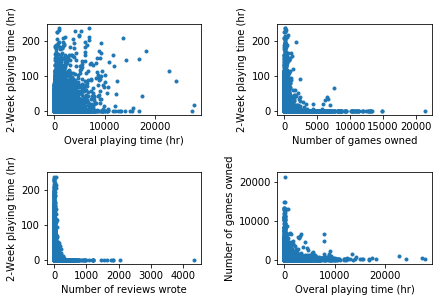

In [20]:
# Scatter plot of considered features
plt.subplot(2,2,1)
plt.plot(df['Alltime_played']/60,df['Played_2Weeks']/60,marker='.',linestyle='none')
plt.ylabel('2-Week playing time (hr)')
plt.xlabel('Overal playing time (hr)')

plt.subplot(2,2,2)
plt.plot(df['Num_games_owned'],df['Played_2Weeks']/60,marker='.',linestyle='none')
plt.ylabel('2-Week playing time (hr)')
plt.xlabel('Number of games owned')

plt.subplot(2,2,3)
plt.plot(df['Num_reviews'],df['Played_2Weeks']/60,marker='.',linestyle='none')
plt.ylabel('2-Week playing time (hr)')
plt.xlabel('Number of reviews wrote')

plt.subplot(2,2,4)
plt.plot(df['Alltime_played']/60,df['Num_games_owned'],marker='.',linestyle='none')
plt.ylabel('Number of games owned')
plt.xlabel('Overal playing time (hr)')

plt.tight_layout(pad=0.2, w_pad=2, h_pad=1.3)

plt.savefig('.../scatter.png',dpi=300, bbox_inches='tight')

In [ ]:
# Quantitative EDA
print(df.describe())
print('Mean daily playing time = ' + str(np.mean(df['Played_2Weeks'])/14))